In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np


In [2]:
# creat file path to csv
data_df= pd.read_csv("../data/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv")
data_df.head()

#delete unecessary columns
covid_deaths_df= data_df[['Data As Of','State','Sex',
                                     'Age Group','COVID-19 Deaths','Total Deaths','Pneumonia and COVID-19 Deaths',
                                     ]]
covid_deaths_df.head()        


,Data As Of,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
0,09/27/2023,United States,All Sexes,All Ages,1146774.0,12303399.0,569264.0
1,09/27/2023,United States,All Sexes,Under 1 year,519.0,73213.0,95.0
2,09/27/2023,United States,All Sexes,0-17 years,1696.0,130970.0,424.0
3,09/27/2023,United States,All Sexes,1-4 years,285.0,14299.0,66.0
4,09/27/2023,United States,All Sexes,5-14 years,509.0,22008.0,143.0


In [3]:
covid_deaths_df.dtypes

Data As Of                        object
State                             object
Sex                               object
Age Group                         object
COVID-19 Deaths                  float64
Total Deaths                     float64
Pneumonia and COVID-19 Deaths    float64
dtype: object

In [4]:
#removing male/female
all_sexes_covid_deaths_df= covid_deaths_df.loc[(covid_deaths_df['Sex']=='All Sexes')]
all_sexes_covid_deaths_df

,Data As Of,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
0,09/27/2023,United States,All Sexes,All Ages,1146774.0,12303399.0,569264.0
1,09/27/2023,United States,All Sexes,Under 1 year,519.0,73213.0,95.0
2,09/27/2023,United States,All Sexes,0-17 years,1696.0,130970.0,424.0
3,09/27/2023,United States,All Sexes,1-4 years,285.0,14299.0,66.0
4,09/27/2023,United States,All Sexes,5-14 years,509.0,22008.0,143.0
...,...,...,...,...,...,...,...
137661,09/27/2023,Puerto Rico,All Sexes,50-64 years,NaN,203.0,NaN
137662,09/27/2023,Puerto Rico,All Sexes,55-64 years,NaN,169.0,NaN
137663,09/27/2023,Puerto Rico,All Sexes,65-74 years,NaN,244.0,NaN
137664,09/27/2023,Puerto Rico,All Sexes,75-84 years,15.0,443.0,NaN


In [5]:
#confirming which states are under column state in order to filter out any unwanted "states"
unique_values = all_sexes_covid_deaths_df['State'].unique()
unique_values

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'New York City', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'Puerto Rico'], dtype=object)

In [6]:
#filter out unwanted data in the States column that we are not using for analysis
filtered_by_state= all_sexes_covid_deaths_df.loc[(all_sexes_covid_deaths_df ['State']!='Puerto Rico') & (all_sexes_covid_deaths_df['State']!='United States')
                                      & (all_sexes_covid_deaths_df['State']!= 'District of Columbia')] 

filling_null_df= filtered_by_state.fillna(0) 
filling_null_df.head(20)

,Data As Of,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
51,09/27/2023,Alabama,All Sexes,All Ages,21520.0,231602.0,7411.0
52,09/27/2023,Alabama,All Sexes,Under 1 year,0.0,1491.0,0.0
53,09/27/2023,Alabama,All Sexes,0-17 years,19.0,2691.0,0.0
54,09/27/2023,Alabama,All Sexes,1-4 years,0.0,344.0,0.0
55,09/27/2023,Alabama,All Sexes,5-14 years,0.0,453.0,0.0
56,09/27/2023,Alabama,All Sexes,15-24 years,46.0,2672.0,16.0
57,09/27/2023,Alabama,All Sexes,18-29 years,142.0,4549.0,55.0
58,09/27/2023,Alabama,All Sexes,25-34 years,267.0,5388.0,102.0
59,09/27/2023,Alabama,All Sexes,30-39 years,416.0,6827.0,147.0
60,09/27/2023,Alabama,All Sexes,35-44 years,670.0,8639.0,231.0


In [7]:
filling_null_df.to_csv("CLEAN_Provisional_COVID-19_Deaths_by_Sex_and_Age.csv", index = False)

In [8]:
clean_data_df= pd.read_csv ('../data/CLEAN_Provisional_COVID-19_Deaths_by_Sex_and_Age.csv')
clean_data_df.head(20)

,Data As Of,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
0,09/27/2023,Alabama,All Sexes,All Ages,21520.0,231602.0,7411.0
1,09/27/2023,Alabama,All Sexes,Under 1 year,0.0,1491.0,0.0
2,09/27/2023,Alabama,All Sexes,0-17 years,19.0,2691.0,0.0
3,09/27/2023,Alabama,All Sexes,1-4 years,0.0,344.0,0.0
4,09/27/2023,Alabama,All Sexes,5-14 years,0.0,453.0,0.0
5,09/27/2023,Alabama,All Sexes,15-24 years,46.0,2672.0,16.0
6,09/27/2023,Alabama,All Sexes,18-29 years,142.0,4549.0,55.0
7,09/27/2023,Alabama,All Sexes,25-34 years,267.0,5388.0,102.0
8,09/27/2023,Alabama,All Sexes,30-39 years,416.0,6827.0,147.0
9,09/27/2023,Alabama,All Sexes,35-44 years,670.0,8639.0,231.0


Text(0.5, 1.0, 'COVID-19 Deaths per State')

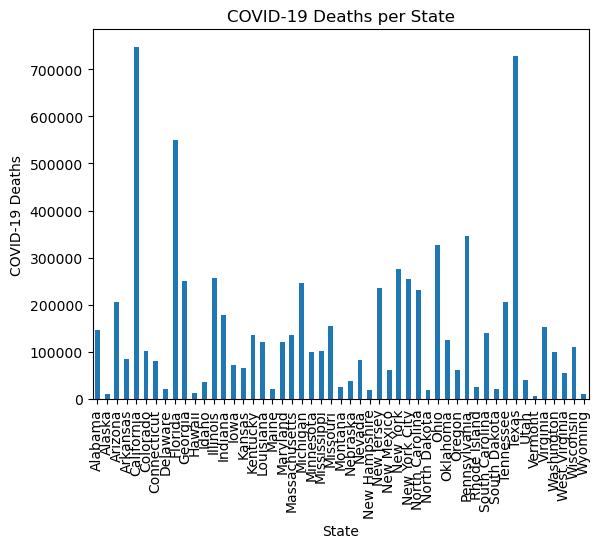

In [9]:
#making bar graph using groupby function
grouped_by_df = clean_data_df.groupby(['State'])['COVID-19 Deaths'].sum().reset_index()

#plot bar graph
grouped_by_df.plot(kind='bar', x='State', y='COVID-19 Deaths', legend=False)

# Add labels and title
plt.xlabel('State')
plt.ylabel('COVID-19 Deaths')
plt.title('COVID-19 Deaths per State')


Text(0.5, 1.0, 'Pneumonia and COVID-19 Deaths per State')

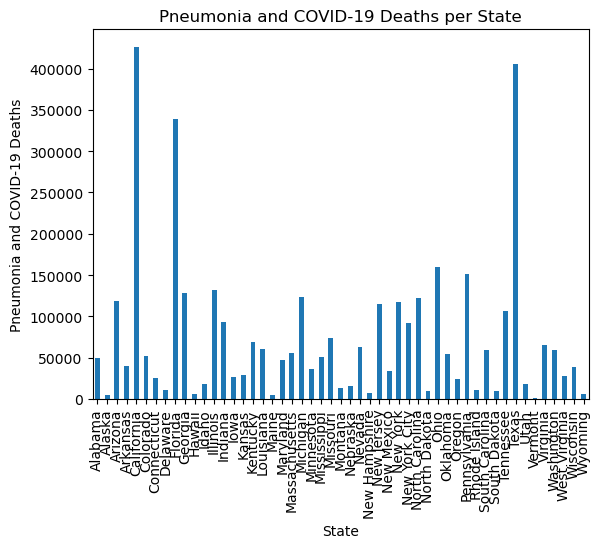

In [10]:
#making bar graph using groupby function
grouped_by_df = clean_data_df.groupby(['State'])['Pneumonia and COVID-19 Deaths'].sum().reset_index()

#plot bar graph
grouped_by_df.plot(kind='bar', x='State', y='Pneumonia and COVID-19 Deaths', legend=False)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Pneumonia and COVID-19 Deaths')
plt.title('Pneumonia and COVID-19 Deaths per State')
